### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

--write answer here--

In [ ]:
Independent variable is a variable that stands alone and isn't changed by the other variables you are trying to measure. 
Dependent variable is something that depends on other factors.

--write answer here--

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

In [ ]:
H0 (Null Hypothesis): There is no difference in population means of response time under incongruent and congruent conditions, which can be mathematically represented as

    H0: μC = μI

H1 (Alternate Hypothesis): Population means under the incongruent condition will be greater than population means under the congruent condition, which can be mathematically represented as

    HA:  μI > μC

We have a sample of n=24 with the recognition times of congruent and incongruent data. And we want to test the null hypothesis that the true mean difference is zero between the two data sets.
We will perform a t-test because our sample size is smaller than 30 (n = 24) and we don't know the population standard deviation.

We will conduct a two-tailed paired t-test, because we want to see if there are any changes in the reading time if the data is displayed congruent or incongruent and our sample size (n) is 24. So we want to measure two different treatments on a persons reaction.

We will perform a two tailed t-test, because we want to see if there if there is a difference in the reaction time.

--write answer here--

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import math
%matplotlib inline

--write answer here--

In [8]:
stroop=pd.read_csv('stroopdata.csv')

In [9]:
stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [10]:
stroop.describe()

Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000

In [11]:
congruent_data = stroop["Congruent"]
incongruent_data = stroop["Incongruent"]
stroop["Difference"] = stroop["Congruent"] - stroop["Incongruent"]
print("\n")
print ("Stroop Data Descriptive Statistics")
print("\n")
print (stroop.describe())
print("\n")



Stroop Data Descriptive Statistics


       Congruent  Incongruent  Difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917   -7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000  -21.919000
25%    11.895250    18.716750  -10.258500
50%    14.356500    21.017500   -7.666500
75%    16.200750    24.051500   -3.645500
max    22.328000    35.255000   -1.950000




In [12]:
tvalueResults = stats.ttest_rel(incongruent_data, congruent_data)
tstat = tvalueResults[0]
pvalue = tvalueResults[1]
print ("t-value = " + '%.2f' % tstat) 
print ("p-value = " + '%.8f' % pvalue)

t-value = 8.02
p-value = 0.00000004


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

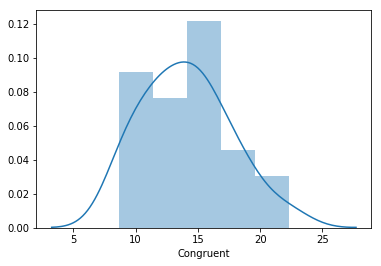

In [25]:
sns.distplot(stroop['Congruent'])

In [ ]:
The data is more or less normally distributed and the middle of the data is a little bit less than 15

In [14]:
sns.distplot(stroop['Incongruent'])

In [15]:
There are some interesting data points on the upper end of this distribution that skew it right.The histogram plots, although both graphs visually appear somewhat positively skewed,
the mean is pretty close to the peak in both graphs which would indicate a normal distribution

SyntaxError: invalid syntax (<ipython-input-15-25d2c6d9eeae>, line 1)

--write answer here--

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [16]:
#Sample size
print(stroop['Congruent'].size)
print(stroop['Incongruent'].size)

24
24


In [19]:
#t-critical value for a 95% confidence level and 23 d.f.
from scipy.stats import t
t.ppf(.95, 23)

1.7138715277470473

In [ ]:
For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being 1.7139

Our point estimate for the difference of the means is: 22.02 - 14.05 = 7.97

Our standard deviation of the differences is calculated below.

In [21]:
stroop['Difference'] = stroop['Congruent'] - stroop['Incongruent']
print("standard deviation for congruent {0:.4f}".format(stroop['Difference'].std(axis=0)))

standard deviation for congruent 4.8648


In [24]:
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

In [ ]:
Our t-statistic (8.02) is greater than our critical value (1.7139).So,we can reject the null hypothesis.
Which matches up with what we expected, That it takes much less time to do the congruent task than it does to do the incongruent task.



--write answer here--

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

In [ ]:
The brain has an image association between the shape of the word and the colour. When there is a mismatch, additional time is necessary for the prefrontal cortex to process the information and decide on its meaning.
A similar effect would likely be observed if the participants were shown words of the correct colour but the wrong text. My hunch, however, is that the difference would be less pronounced as I’d expect the visual colour representation to be more ingrained in the brain that word shape associations.